<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-assignments-1-3/blob/main/Support%20vector%20machine(Salarydata).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
path = r"/content/SalaryData_Train(1).csv"
path1 = r"/content/SalaryData_Test(1).csv"

In [3]:
train_data = pd.read_csv(path)
test_data = pd.read_csv(path1)

In [4]:
data = pd.concat([train_data, test_data], ignore_index=True)

In [5]:
print(data.head())

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1           

In [6]:
print(data.describe())

                age   educationno   capitalgain   capitalloss  hoursperweek
count  45221.000000  45221.000000  45221.000000  45221.000000  45221.000000
mean      38.548086     10.118463   1101.454700     88.548617     40.938038
std       13.217981      2.552909   7506.511295    404.838249     12.007640
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000


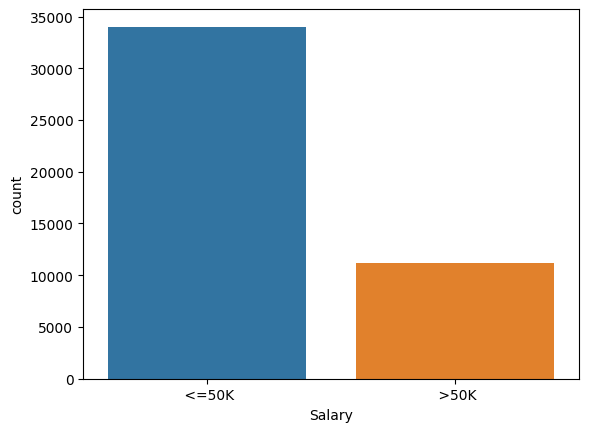

In [7]:
sns.countplot(x="Salary", data=data)
plt.show()

In [8]:
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()
data[non_numeric_cols] = data[non_numeric_cols].astype('category')

In [9]:
label_encoder = LabelEncoder()
for column in non_numeric_cols:
    data[column] = label_encoder.fit_transform(data[column])

In [10]:
train_data = data[:train_data.shape[0]]
test_data = data[train_data.shape[0]:]

In [11]:
X_train = train_data.drop("Salary", axis=1)
y_train = train_data["Salary"]

In [12]:
X_test = test_data.drop("Salary", axis=1)
y_test = test_data["Salary"]

In [13]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [14]:
y_pred = svm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10997   363]
 [ 2703   997]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060



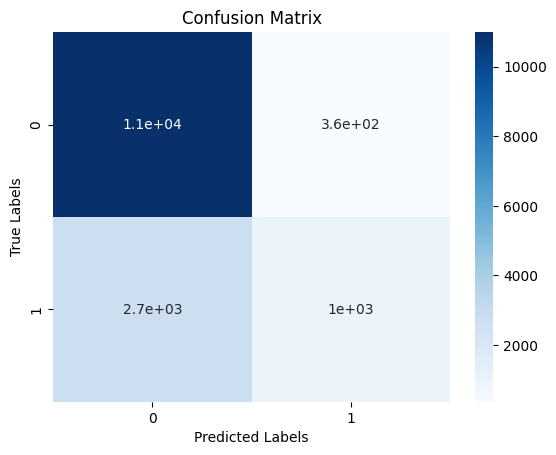

In [15]:
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

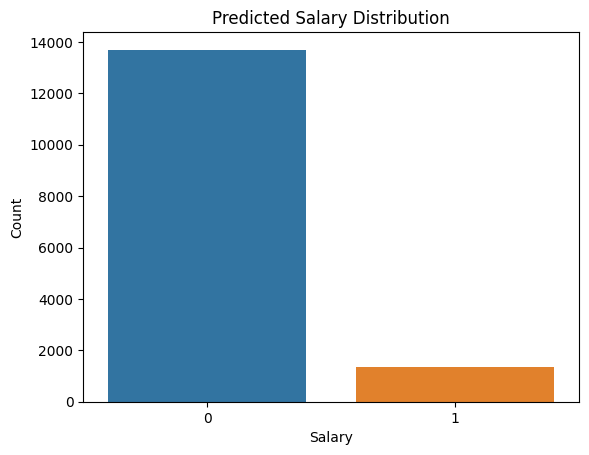

In [16]:
predicted_salary_counts = pd.Series(y_pred).value_counts()
sns.barplot(x=predicted_salary_counts.index, y=predicted_salary_counts.values)
plt.xlabel("Salary")
plt.ylabel("Count")
plt.title("Predicted Salary Distribution")
plt.show()